### homochiral tiling with Tile(a,b)

Code is based on the drawsvg package: 
* https://pypi.org/project/drawsvg/

And the python code with alternate chirality for inflation for spectre tiling:
* https://github.com/shrx/spectre/blob/master/spectre.py
 

In [1]:
import drawsvg as draw
import numpy as np
from time import time

# points in the plane are coded using class pt(x,y)
from points import * # class pt and operations on pt elements

# contains all shapes in terms of points
from shapes import * 

# contains transformations (rotation, translation, miror, etc ...)
from transformations import * 

# contains functions to draw tiles and clusters
from draw_tiles_clusters import *

Rh (for horizontal mirror) is used in all drawings.

It is because by default the y axis is oriented downwards in svg graphics.

* convention for odd orientation is magenta color for the triangle
* convention for even orientation is cyan color for the triangle

In [2]:
COLOR_MAP={    
    "ODD": "magenta", # odd orientation 
    "EVEN": "cyan", # even orientation
}

the 12 T_base vectors for Tile(a,b) and Tile(b,a)

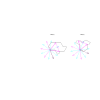

In [3]:
d = draw.Drawing(100, 100, origin='center')

meshsize=30

#a = np.sqrt(3)
#b=1.

a = 5
b= 2

transab=ttrans(meshsize,0)
transab=mul(Rh,transab)

    
#d.append(draw.Text('a = '+str(round(a,3)), 2, 0, -meshsize/2))
#d.append(draw.Text('b = '+str(round(b,3)), 2, meshsize, -meshsize/2))
d.append(draw.Text('Tile('+str(round(a,2))+','+str(round(b,2))+')', 1.2, 0,-meshsize/2))
d.append(draw.Text('Tile('+str(round(b,2))+','+str(round(a,2))+')', 1.2, meshsize,-meshsize/2))


for i in range(0,6):
    drawTbaseVector(d,a,b,Rh,COLOR_MAP["ODD"],2*i)

for i in range(0,6):
    drawTbaseVector(d,a,b,Rh,COLOR_MAP["EVEN"],2*i+1)

for i in range(0,6):
    drawTbaseVector(d,b,a,transab,COLOR_MAP["ODD"],2*i)

for i in range(0,6):
    drawTbaseVector(d,b,a,transab,COLOR_MAP["EVEN"],2*i+1)


drawTile(d, a, b, Rh, COLOR_MAP["ODD"])
drawTile(d, b, a, transab, COLOR_MAP["ODD"])

#drawTileBowTie(d, a, b, Rh, COLOR_MAP["ODD"])
#drawTileBowTie(d, b, a, transab, COLOR_MAP["ODD"])


drawTbaseVector(d,a,b,Rh,"green",0)

drawTbaseVector(d,b,a,transab,"green",0)


path=r'.\svg-clusters'
svg_file=path+r'\T_base-ab-and-ba'+'.svg'

d.save_svg(svg_file)

d  # Display as SVG 

In [4]:
#a=np.sqrt(3)
#b=1

a=0.8
b=0.11

for i in range(0,12):
    print(T_base(a,b)[i].xy,'\t',T_base(b,a)[i].xy)

for i in range(0,12):
    print(T_base(a,b)[i].x,'\t',T_base(a,b)[i].y,'\t',T_base(b,a)[i].x,'\t',-T_base(b,a)[i].y)

[0.1905255888325763, -1.385640646055102] 	 [1.3856406460551023, -0.19052558883257675]
[0.8578203230275507, -1.1047372055837121] 	 [1.2952627944162887, 0.5278203230275508]
[1.2952627944162884, -0.5278203230275513] 	 [0.8578203230275514, 1.104737205583712]
[1.385640646055102, 0.19052558883257623] 	 [0.19052558883257684, 1.3856406460551023]
[1.1047372055837121, 0.8578203230275505] 	 [-0.5278203230275506, 1.2952627944162887]
[0.5278203230275511, 1.2952627944162882] 	 [-1.1047372055837121, 0.8578203230275513]
[-0.19052558883257614, 1.385640646055102] 	 [-1.3856406460551023, 0.19052558883257692]
[-0.8578203230275505, 1.1047372055837124] 	 [-1.2952627944162889, -0.5278203230275506]
[-1.2952627944162882, 0.5278203230275519] 	 [-0.857820323027552, -1.1047372055837117]
[-1.385640646055102, -0.19052558883257606] 	 [-0.190525588832577, -1.3856406460551023]
[-1.104737205583712, -0.857820323027551] 	 [0.5278203230275511, -1.2952627944162889]
[-0.5278203230275519, -1.295262794416288] 	 [1.10473720558

C Cluster code

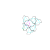

In [5]:
d = draw.Drawing(50, 50, origin='center')

a=3
b=1

transfo_C_cluster=[
    mul(ttrans(TILE(a,b)[2].x,TILE(a,b)[2].y),trot(-np.pi/6-2*np.pi/3)),

    mul(T_trans(a,b)[2],trot(-np.pi/6-np.pi/3)),

    mul(ttrans(TILE(a,b)[6].x,TILE(a,b)[6].y),trot(-np.pi/6)),

    mul(ttrans(TILE(a,b)[8].x,TILE(a,b)[8].y),trot(-np.pi/6+np.pi/3)), 

    mul(T_trans(a,b)[4],trot(-np.pi/6-4*np.pi/3)),

# inversion to b,a for T_base only once !!!
    mul(ttrans(TILE(a,b)[12].x+T_base(b,a)[9].x,TILE(a,b)[12].y+T_base(b,a)[9].y),trot(-np.pi/6)) 

    ]


drawTileTrifle(d, a, b, Rh, COLOR_MAP["ODD"])

for transfo in transfo_C_cluster:
    drawTileTrifle(d, b, a, mul(Rh,transfo), COLOR_MAP["EVEN"])

drawTbaseVector(d,b,a,Rh,"green",9)

path=r'.\svg-clusters'
svg_file=path+r'\cluster'+'.svg'

d.save_svg(svg_file)

d

Cluster with the three green points

10.096647832002844
10.096647832002844
10.096647832002846


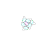

In [6]:
d = draw.Drawing(50, 50, origin='center')

a=1.2
b=1.5

transfo_C_cluster=[
    mul(ttrans(TILE(a,b)[2].x,TILE(a,b)[2].y),trot(-np.pi/6-2*np.pi/3)),

    mul(T_trans(a,b)[2],trot(-np.pi/6-np.pi/3)),

    mul(ttrans(TILE(a,b)[6].x,TILE(a,b)[6].y),trot(-np.pi/6)),

    mul(ttrans(TILE(a,b)[8].x,TILE(a,b)[8].y),trot(-np.pi/6+np.pi/3)), 

    mul(T_trans(a,b)[4],trot(-np.pi/6-4*np.pi/3)),

# inversion to b,a for T_base only once !!!
    mul(ttrans(TILE(a,b)[12].x+T_base(b,a)[9].x,TILE(a,b)[12].y+T_base(b,a)[9].y),trot(-np.pi/6)) 

    ]


print(distance(GREEN_POINTS(a,b)[0],GREEN_POINTS(a,b)[1]))
print(distance(GREEN_POINTS(a,b)[1],GREEN_POINTS(a,b)[2]))
print(distance(GREEN_POINTS(a,b)[2],GREEN_POINTS(a,b)[0]))


drawTileTrifle(d, a, b, Rh, COLOR_MAP["ODD"])

for transfo in transfo_C_cluster:
    drawTileTrifle(d, b, a, mul(Rh,transfo), COLOR_MAP["EVEN"])

#draw green points
# add the Rh reflection for svg before drawing any point !!!

for p in GREEN_POINTS(a,b):
    p=transPt(Rsvg,p) #change y to -y before svg drawing
    d.append(draw.Circle(p.x, p.y, 0.25,
        fill="rgb(0, 255, 0)"))

# Barycenter of the three green points
sumx=0
sumy=0
for p in GREEN_POINTS(a,b):
    p=transPt(Rsvg,p)
    sumx+=p.x
    sumy+=p.y

# draw the barycenter
d.append(draw.Circle(sumx/3, sumy/3, 0.1,
        fill="rgb(0, 255, 0)"))


#for i in range(0,3):
#    grcx=svg(GREEN_POINTS(a,b)[i]).x
#    grcy=svg(GREEN_POINTS(a,b)[i]).y
#    d.append(draw.Circle(grcx, grcy, 0.25,
#        fill="rgb(0, 255, 0)"))

#centergreenx=(svg(GREEN_POINTS(a,b)[0]).x+svg(GREEN_POINTS(a,b)[1]).x+svg(GREEN_POINTS(a,b)[2]).x)/3
#centergreeny=(svg(GREEN_POINTS(a,b)[0]).y+svg(GREEN_POINTS(a,b)[1]).y+svg(GREEN_POINTS(a,b)[2]).y)/3

#d.append(draw.Circle(centergreenx, centergreeny, 0.1, fill="rgb(0, 255, 0)"))

#drawTbaseVector(d,b,a,Rh,"green",9)


path=r'.\svg-clusters'
svg_file=path+r'\cluster_green_points'+'.svg'

d.save_svg(svg_file)

d

Full cluster

10.533112104520058
10.53311210452006
10.533112104520058


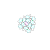

In [50]:
d = draw.Drawing(50, 50, origin='center')

a=1.2
b=1.6

transfo_C_full_cluster=[
    mul(ttrans(TILE(a,b)[2].x,TILE(a,b)[2].y),trot(-np.pi/6-2*np.pi/3)),
# duplicated with inversion operation around green point
    mul(ttrans(TILE(a,b)[2].x+2*T_base(b,a)[11].x,TILE(a,b)[2].y+2*T_base(b,a)[11].y),trot(-np.pi/6-2*np.pi/3+np.pi)),

    mul(T_trans(a,b)[2],trot(-np.pi/6-np.pi/3)),
# duplicated
    mul(mul(T_trans(a,b)[2],T_trans(b,a)[1]),trot(-np.pi/6-np.pi/3)),
 
    mul(ttrans(TILE(a,b)[6].x,TILE(a,b)[6].y),trot(-np.pi/6)),
# duplicated with inversion operation around green point
    mul(ttrans(TILE(a,b)[6].x+2*T_base(b,a)[3].x,TILE(a,b)[6].y+2*T_base(b,a)[3].y),trot(-np.pi/6+np.pi)),

    mul(ttrans(TILE(a,b)[8].x,TILE(a,b)[8].y),trot(-np.pi/6+np.pi/3)), 
# duplicated
    mul(ttrans(TILE(a,b)[8].x+T_base(b,a)[5].x,TILE(a,b)[8].y+T_base(b,a)[5].y),trot(-np.pi/6+np.pi/3)), 

    mul(T_trans(a,b)[4],trot(-np.pi/6-4*np.pi/3)),
# duplicated with inversion operation around green point
    mul(mul(mul(T_trans(a,b)[4],T_trans(b,a)[7]),T_trans(b,a)[7]),trot(-np.pi/6-4*np.pi/3+np.pi)),

# inversion to b,a for T_base !!!
    mul(ttrans(TILE(a,b)[12].x+T_base(b,a)[9].x,TILE(a,b)[12].y+T_base(b,a)[9].y),trot(-np.pi/6)), 
# duplicated tile
    mul(ttrans(TILE(a,b)[12].x+2*T_base(b,a)[9].x,TILE(a,b)[12].y+2*T_base(b,a)[9].y),trot(-np.pi/6)) 

    ]


print(distance(GREEN_POINTS(a,b)[0],GREEN_POINTS(a,b)[1]))
print(distance(GREEN_POINTS(a,b)[1],GREEN_POINTS(a,b)[2]))
print(distance(GREEN_POINTS(a,b)[2],GREEN_POINTS(a,b)[0]))


drawTileTrifle(d, a, b, Rh, COLOR_MAP["ODD"])

for transfo in transfo_C_full_cluster:
    drawTileTrifle(d, b, a, mul(Rh,transfo), COLOR_MAP["EVEN"])

#draw green points
# add the Rh reflection for svg before drawing any point !!!

for p in GREEN_POINTS(a,b):
    p=transPt(Rsvg,p) #change y to -y before svg drawing
    d.append(draw.Circle(p.x, p.y, 0.25,
        fill="rgb(0, 255, 0)"))

# Barycenter of the three green points
sumx=0
sumy=0
for p in GREEN_POINTS(a,b):
    p=transPt(Rsvg,p)
    sumx+=p.x
    sumy+=p.y

# draw the barycenter
d.append(draw.Circle(sumx/3, sumy/3, 0.1,
        fill="rgb(0, 255, 0)"))




#drawTbaseVector(d,b,a,Rh,"green",9)


path=r'.\svg-clusters'
svg_file=path+r'\full_cluster'+'.svg'

d.save_svg(svg_file)

d

In [ ]:
a=2
b=1.4
T_trans(a,b)[2]

[1, 0, 4.212435565298215, 0, 1, 0.36794919243112245]

In [ ]:
a=2
b=1.4
T_trans(a,b)[2]

to continue ...
* understand relationship between T_base(a,b) and T_base(b,a) !!!
* need to define green points coordinates with (a,b)
* add glue points and green points -> need to incorporate properly the Rh transformation for points
* add the triangle joining three green points
* class for clusters
* add the two tiles obtained by inversion in a full cluster
* add the contour of a C cluster in shapes.py
* possibility to transform the cluster (apply a transformation on it)
* count the different types of tiles M1, M3, M5 ... and M2, M4, M6 ...
* count of the 12 types of monotiles ??? global numtile + 12 other global counts ?